In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import itertools
import plotly.express as px
from numba import jit, njit

In [14]:
roh_data_founders = pd.read_csv("data/bcftoolsroh_founders", sep="\t", header=None, skiprows=4)
roh_data_founders.head()

0      1   2        3        4      5    6     7
0  RG  Alice  S1   384015   429504  45490  182  48.4
1  RG  Alice  S1   820118   864314  44197  173  13.6
2  RG  Alice  S1  1203503  1222181  18679   99  60.1
3  RG  Alice  S1  1228034  1230235   2202   37  30.4
4  RG  Alice  S1  1267444  1289236  21793  108  19.8

In [20]:
len(set(roh_data_founders[1].to_list()))

41

In [21]:
len(set(roh_data_offspring[1].to_list()))

128

In [17]:
roh_founders = defaultdict(int)

for j,row in roh_data_founders.iterrows():
    roh_founders[(row[2], row[3], row[4])] += 1

In [4]:
roh_data_offspring = pd.read_csv("data/bcftoolsroh_offspring", sep="\t", header=None, skiprows=4)
roh_data_offspring.head()
roh_offspring = defaultdict(int)

for j,row in roh_data_offspring.iterrows():
    roh_offspring[(row[2], row[3], row[4])] += 1

In [5]:
offspring = list()

for (k, v) in roh_offspring.items():
    for _ in range(v):
        offspring.append(abs(k[1] - k[2]))
        
founders = list()
for (k, v) in roh_founders.items():
    for _ in range(v):
        founders.append(abs(k[1] - k[2]))
    if abs(k[1] - k[2]) > 100000000:
        print("{} {}".format(k, v))

('S1', 6848563, 122327477) 1


In [6]:
offspring_df = pd.DataFrame({"Category": ["Offspring"] * len(offspring), "Value": offspring})
founders_df = pd.DataFrame({"Category": ["Founders"] * len(founders), "Value": founders})
df = pd.concat([offspring_df, founders_df])

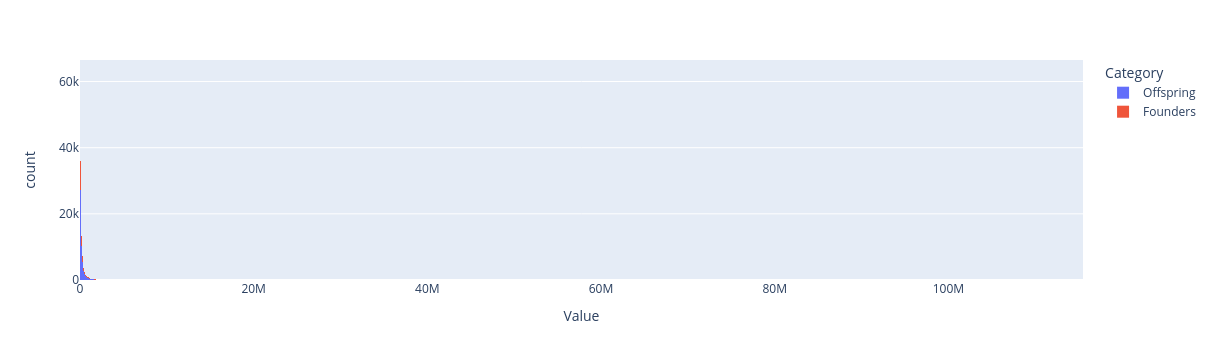

In [7]:
px.histogram(df, x="Value", color="Category")

In [8]:
np.mean(offspring)

419092.9188060787

In [11]:
[np.mean(founders), np.min(founders), np.max(founders), np.median(founders)]

[442092.3708663509, 306, 115478914, 87905.5]

In [12]:
[np.mean(offspring), np.min(offspring), np.max(offspring), np.median(offspring)]

[419092.9188060787, 371, 73089505, 91151.0]